In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
start_year = 1900
end_year = 2100
today = 2015 # year
time_step = 1 # years

eql_co2 = 280 # equalibrium co2
intial_co2 = 290
co2_e_growth = 0.0225 # exponential growth
co2_drawdown_rate = 0.01

# radiative forcing (W m^-2)
current_aerosol_rf = -0.5
double_co2_rf = 4 

co2_cs = 3 # cliamte sensitivity (deg C)
tc_wm2 = co2_cs / double_co2_rf # temperature change per Watts/m2 of forcing
temp_response_time = 20 # years

In [3]:
years = [start_year]

co2_bau = [intial_co2] # business as usual

# radiative forcing (W m^-2)
co2_bau_rf = [0]
aerosol_bau_rf = [0]
total_bau_rf = [0]

eql_bau_temp = [0] # equalibrium temperture (deg C)
trans_bau_temp = [0] # transient temperture (deg C)

co2_bau_roc = [0] # business as usual rate of change 

In [4]:
# co2 values BAU
while years[-1] < end_year:
    years.append(years[-1] + time_step)
    co2_bau.append(eql_co2 + (co2_bau[-1] - eql_co2) * (1 + co2_e_growth * time_step))
    co2_bau_rf.append(double_co2_rf * np.log(co2_bau[-1] / eql_co2) / np.log(2))

    co2_bau_roc.append((co2_bau[-1] - co2_bau[-2]) / time_step)


today_index = years.index(today)
B = current_aerosol_rf / ((co2_bau[today_index] - co2_bau[today_index-1]) / time_step)

# areosol rf & temp values BAU 
for ts in range(1, len(years)):
   aerosol_bau_rf.append(max(co2_bau_roc[ts]*B, current_aerosol_rf)) 
   total_bau_rf.append(co2_bau_rf[ts] + aerosol_bau_rf[ts])
   eql_bau_temp.append(total_bau_rf[ts] * tc_wm2)
   trans_bau_temp.append(trans_bau_temp[-1] + (eql_bau_temp[ts] - trans_bau_temp[-1]) * time_step / temp_response_time)


In [5]:
# WWU values
co2_wwu = co2_bau[:today_index]

co2_wwu_rf = co2_bau_rf[:today_index]
aerosol_wwu_rf = aerosol_bau_rf[:today_index]
total_wwu_rf = total_bau_rf[:today_index]

eql_wwu_temp = eql_bau_temp[:today_index]
trans_wwu_temp = trans_bau_temp[:today_index]


for ts in range(today_index, len(years)):
    co2_wwu.append(co2_wwu[-1] + (340 - co2_wwu[-1]) * (co2_drawdown_rate * time_step))
    co2_wwu_rf.append(double_co2_rf * np.log(co2_wwu[-1] / eql_co2) / np.log(2))
    aerosol_wwu_rf.append(0) # aerosol rf not needed because it dissipates almost immediately.
    total_wwu_rf.append(co2_wwu_rf[-1] + aerosol_wwu_rf[-1]) 


    eql_wwu_temp.append(total_wwu_rf[-1] * tc_wm2)
    trans_wwu_temp.append(trans_wwu_temp[-1] + (eql_wwu_temp[-1] - trans_wwu_temp[-1]) * time_step / temp_response_time)


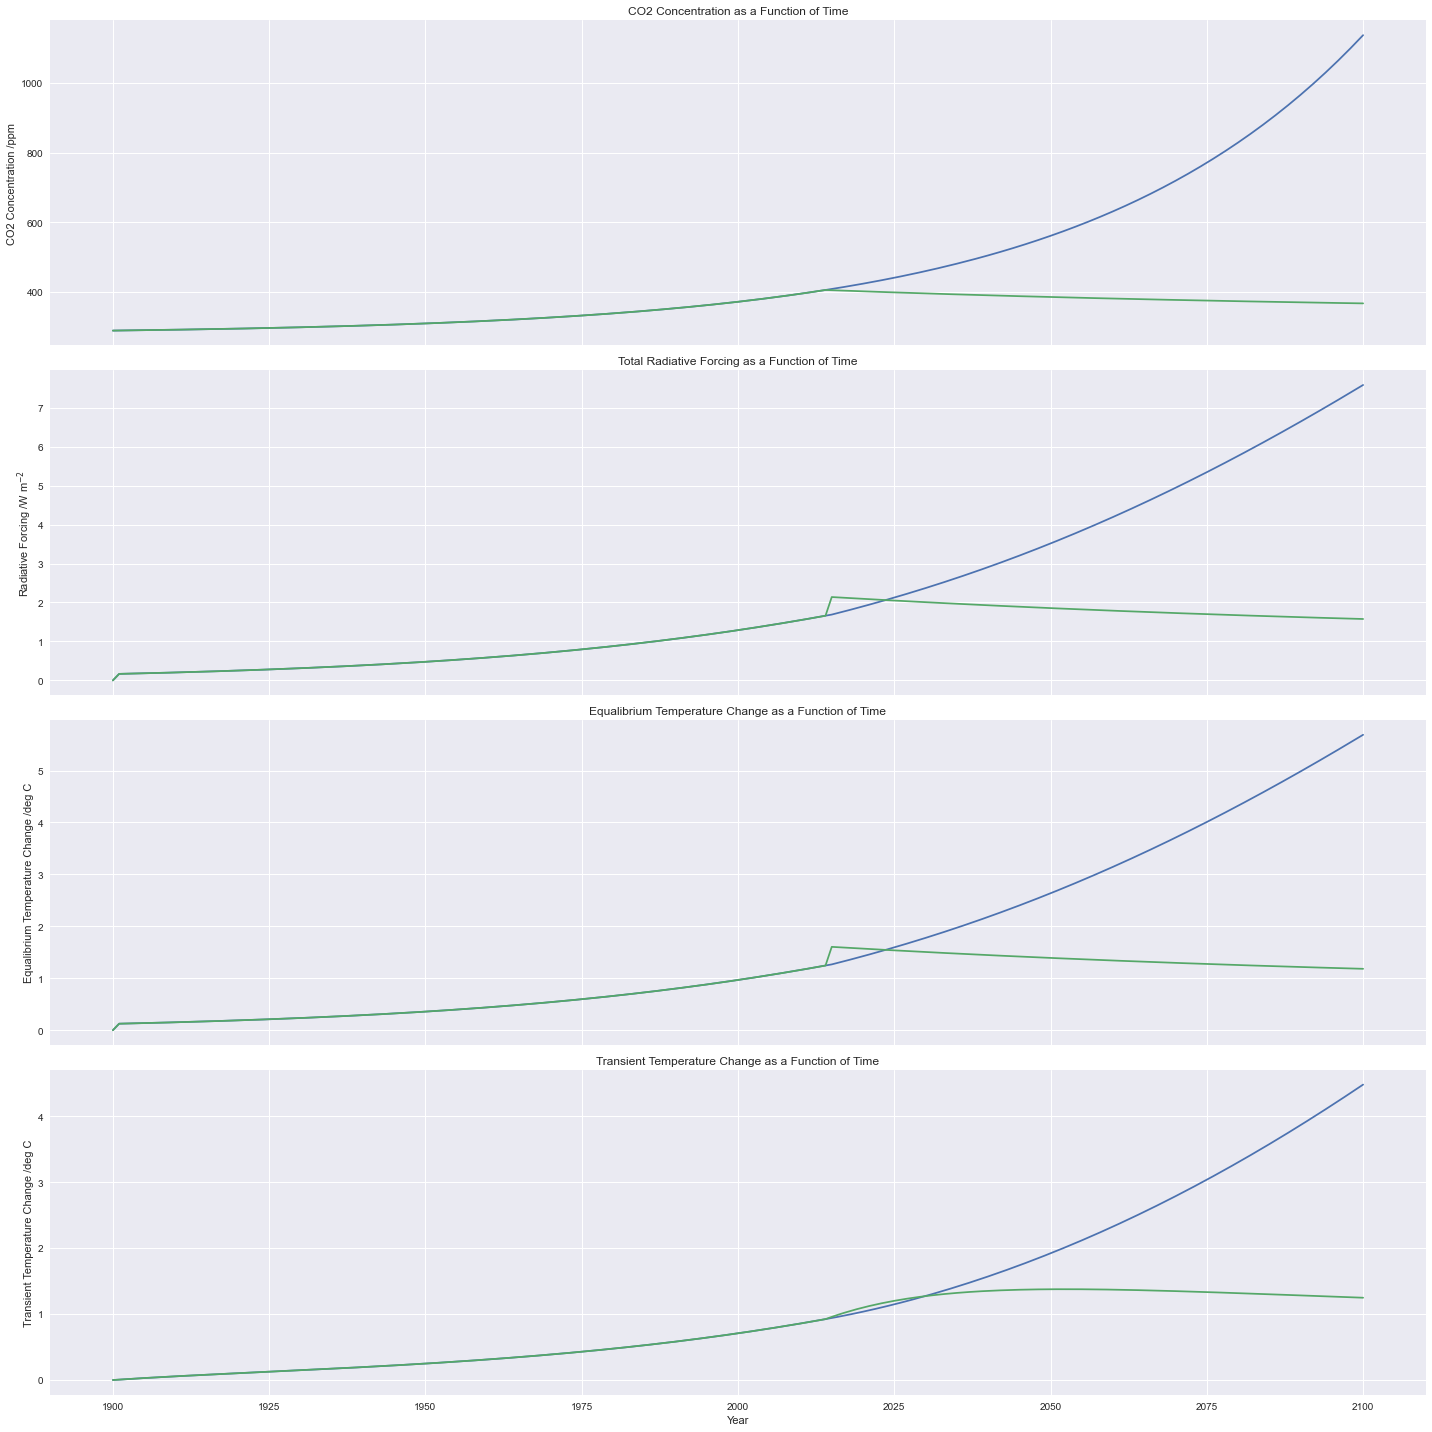

In [6]:
fig, ax = plt.subplots(4, figsize=(20, 20), sharex=True)

ax[0].plot(years, co2_bau)
ax[0].plot(years, co2_wwu)
ax[0].set(title='CO2 Concentration as a Function of Time', ylabel='CO2 Concentration /ppm')

ax[1].plot(years, total_bau_rf)
ax[1].plot(years, total_wwu_rf)
ax[1].set(title='Total Radiative Forcing as a Function of Time', ylabel='Radiative Forcing /W m$^{-2}$')

ax[2].plot(years, eql_bau_temp)
ax[2].plot(years, eql_wwu_temp)
ax[2].set(title='Equalibrium Temperature Change as a Function of Time', ylabel='Equalibrium Temperature Change /deg C')

ax[3].plot(years, trans_bau_temp)
ax[3].plot(years, trans_wwu_temp)
ax[3].set(title='Transient Temperature Change as a Function of Time', ylabel='Transient Temperature Change /deg C', xlabel='Year')

fig.tight_layout()

plt.show()